In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # 플롯 스타일 지정을 위해
import numpy as np
import pandas as pd
import matplotlib as mpl
plt.rcParams['font.family'] = "Malgun Gothic"
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 데이터 읽어들이기
tbl = pd.read_csv("Test A.csv")

# 2. 칼럼(열) 자르고 졍규화 하기
label = tbl["Defect Status"]
t = tbl["Temper"]
h = tbl["Humidity"]
C = tbl["Completeness"].str[:-1].astype('float32')
th = pd.concat([t,h],axis=1)   #온도와 습도만을 이용한 방법
thc = pd.concat([t,h,C],axis=1)#온도와 습도와 완성도를 이용한 방법


2D를 이용한 군집화

<IPython.core.display.Javascript object>


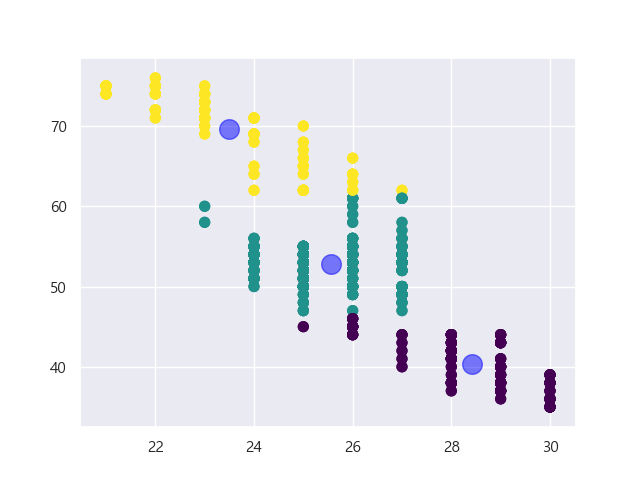

In [3]:
plt.scatter(t,h,s=10);
plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(th)
y_kmeans = kmeans.predict(th)

plt.scatter(t,h,c=y_kmeans,s=50,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='blue',s=200,alpha=0.5)

3D를 이용한 군집화

<IPython.core.display.Javascript object>


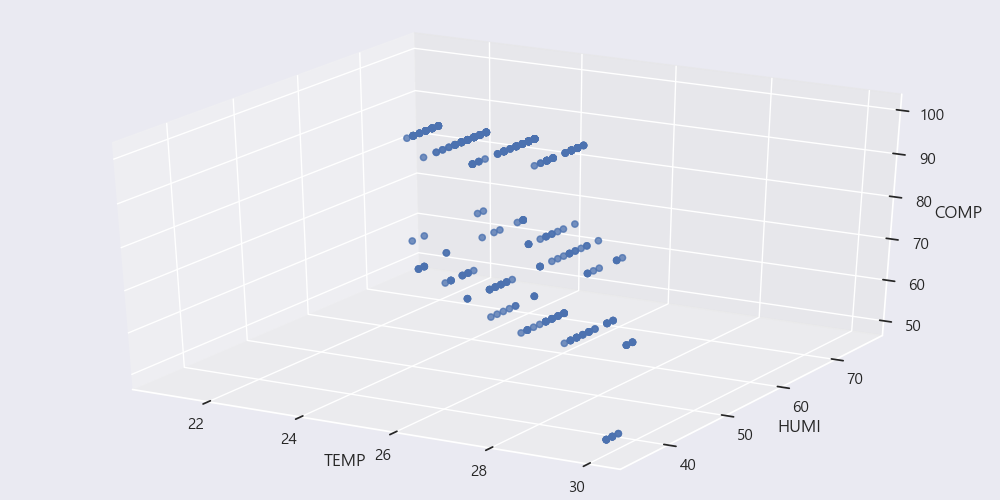

In [4]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
fig = plt.figure(figsize=(10,5))

ax = Axes3D(fig) 
ax.scatter(t, h, C, s= 20, alpha=0.5, cmap=plt.cm.Greens)
ax.set_xlabel('TEMP')
ax.set_ylabel('HUMI')
ax.set_zlabel('COMP')
plt.show()


<IPython.core.display.Javascript object>


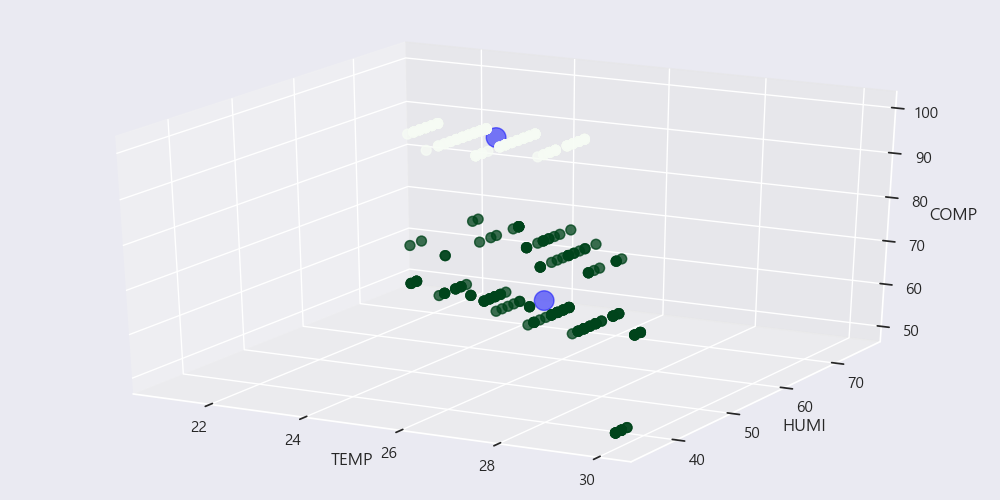

In [5]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from sklearn.cluster import KMeans
kmeans_3d = KMeans(n_clusters=2)
#thc_array=np.array(thc)
kmeans_3d.fit(thc)
y_kmeans_3d = kmeans_3d.predict(thc)


#군집화 scatter
fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig) 
ax.scatter(t,h,C,c=y_kmeans_3d, alpha=0.5, s=50, cmap=plt.cm.Greens)
ax.set_xlabel('TEMP')
ax.set_ylabel('HUMI')
ax.set_zlabel('COMP')


#군집화 중심점 scatter
centers = kmeans_3d.cluster_centers_
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c='blue',s=200,alpha=0.5)


plt.show()

정답률 :  0.7647058823529411


<IPython.core.display.Javascript object>


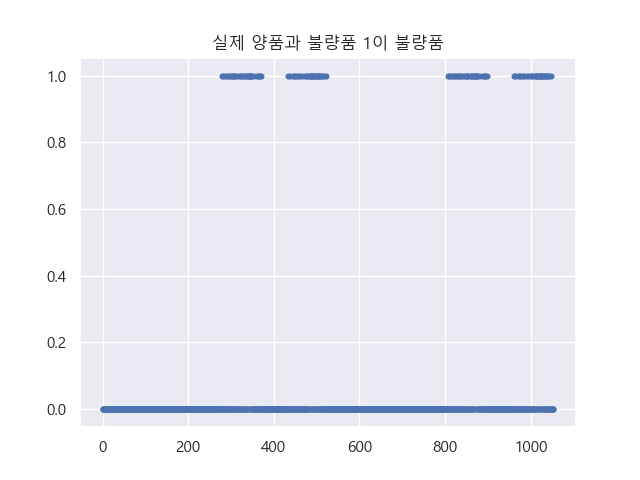

<IPython.core.display.Javascript object>


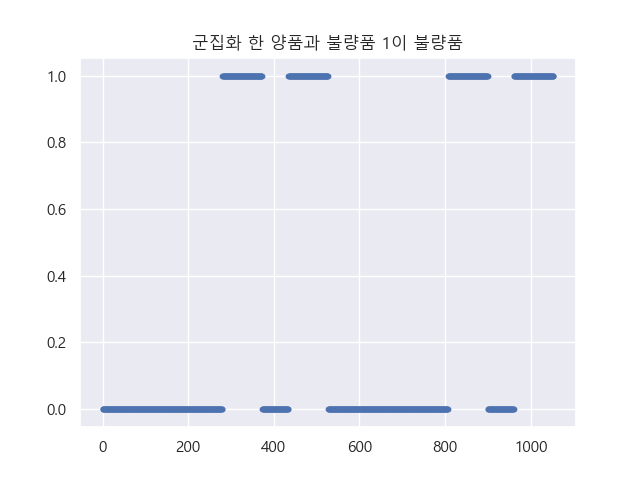

In [15]:
from sklearn import metrics

label = np.array(label).reshape(-1)
ac_score = metrics.accuracy_score(label,y_kmeans_3d)
print('정답률 : ', ac_score)


#길이 생성
mLen= np.zeros(len(y_kmeans_3d))
for i in range(len(y_kmeans_3d)):
    mLen[i]=i
'''
#데이터가 반전 되어있을때 사용
for i in range(len(y_kmeans_3d)):
    if y_kmeans_3d[i] == 1 : y_kmeans_3d[i]=0
    else :y_kmeans_3d[i]=1
''' 
plt.figure()
plt.scatter(mLen,label,s = 11)
plt.title('실제 양품과 불량품 1이 불량품')
plt.show()
plt.figure()
plt.scatter(mLen,y_kmeans_3d,s=10)
plt.title('군집화 한 양품과 불량품 1이 불량품')
plt.show()